In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df=pd.read_csv("housing.csv")
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


 <h1 style="background-color:green;color:white"> Data preprocessing</h1>

In [3]:
housing_df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

 ##  <h3 style="background-color:red;color:white"> here we find the column total_bedrooms have null value</h3>

In [4]:
housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

 <h3 style="background-color:green;color:white"> Impute mean of column value in place of missing value</h3>

In [5]:
housing_df.total_bedrooms=housing_df.total_bedrooms.fillna(housing_df.total_bedrooms.mean())
housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

 <h1 style="background-color:green;color:white">Exploratory Data analysis</h1>

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 <h4 style="background-color:green;color:white">Bivariate analysis</h4>

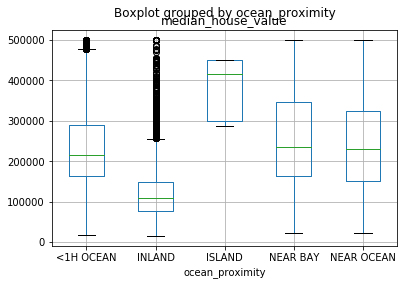

In [7]:
housing_df.boxplot(column='median_house_value',by='ocean_proximity')

[]

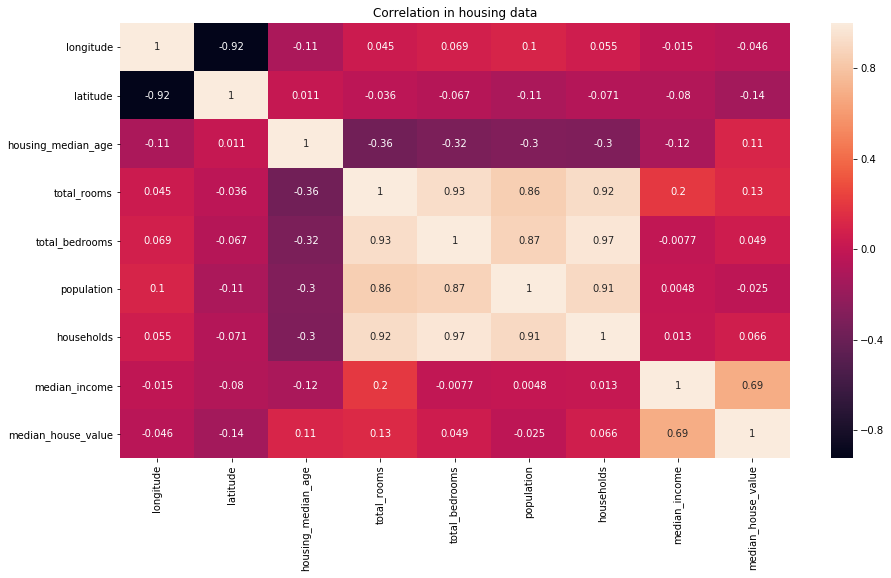

In [8]:
import seaborn as sns

plt.figure(figsize=(15,8))


corr = housing_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.title('Correlation in housing data')
plt.plot()

from above diagram we found that there is high correlation between<br><pre>
total_bedrooms and households
total_bedrooms and total_rooms
households and total_rooms
population and households</pre>
  <h5 style="background-color:red;color:white"> 
 At this point we can drop households and total_rooms columns while creating model;
 since other columns are present which can convey similar information
 </h5>

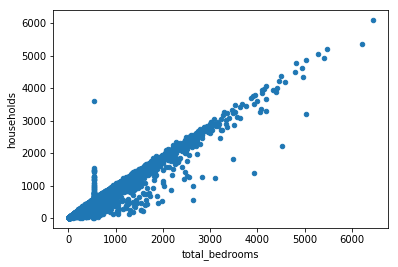

In [9]:
housing_df.plot.scatter('total_bedrooms','households')

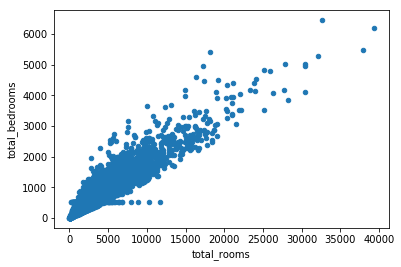

In [10]:
housing_df.plot.scatter('total_rooms','total_bedrooms')

In [11]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')


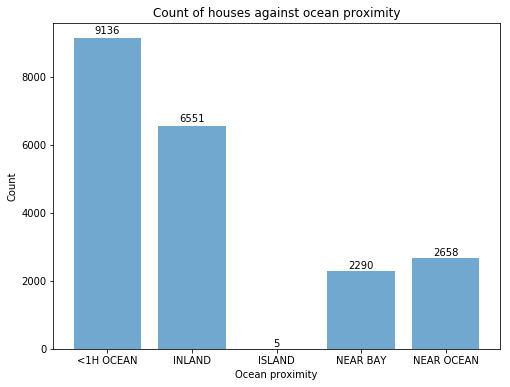

In [12]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
s=housing_df.ocean_proximity.value_counts()


rect=ax.bar(s.index,s,alpha=0.64)
plt.title('Count of houses against ocean proximity')
plt.xlabel('Ocean proximity')
autolabel(rect)
plt.ylabel('Count')
plt.show()

[]

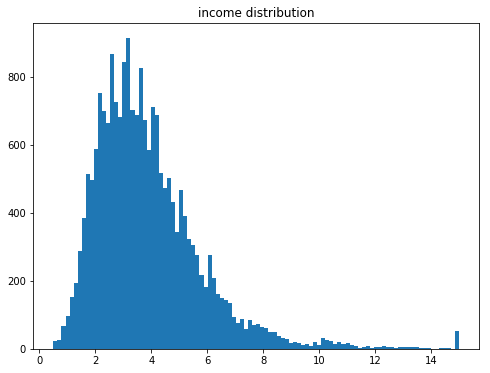

In [13]:
plt.figure(figsize=(8,6))
plt.hist(housing_df.median_income,bins=100)
plt.title('income distribution')
plt.plot()


<h3 style="background-color:green;color:white"> Encode the categorial data. So now instead of character values we will have numerical value</h3>

In [14]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [15]:
from sklearn.preprocessing import LabelEncoder
x_labelencoder = LabelEncoder()
housing_df.ocean_proximity=x_labelencoder.fit_transform(housing_df.ocean_proximity)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [16]:
x_labelencoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

<h3 style="background-color:green;color:white"> Implementing OneHotEncoder to separate category variables into dummy 
variables.</h3>

In [17]:
from sklearn.preprocessing import OneHotEncoder
X_onehotencoder = OneHotEncoder (categorical_features = [8])
X = X_onehotencoder.fit_transform(housing_df)


In [18]:
x=X.toarray()
x[:,8:11]

array([[ 880.,  129.,  322.],
       [7099., 1106., 2401.],
       [1467.,  190.,  496.],
       ...,
       [2254.,  485., 1007.],
       [1860.,  409.,  741.],
       [2785.,  616., 1387.]])

In [19]:
columns=housing_df.columns.tolist()

new_columns=[('proximity_'+i) for i in x_labelencoder.classes_]
new_columns[5:]=columns[0:-2]
new_columns.append(columns[-1])
new_columns

['proximity_<1H OCEAN',
 'proximity_INLAND',
 'proximity_ISLAND',
 'proximity_NEAR BAY',
 'proximity_NEAR OCEAN',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [20]:
housing_df_new=pd.DataFrame(x,index=housing_df.index,columns=new_columns)

housing_df_new.head()

,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


 <h1 style="background-color:green;color:white">Feature Engineering</h1>

Instead of having <font color=red>longitude and latitude</font>
as separate attribute we will put an attribute <font color=blue>distance_from_california</font><br/>
california is at <br><font color=blue>Latitude	36.778259 <br> Longitude	-119.41793</font>
<br/>
we use the ‘haversine’ formula to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points (ignoring any hills they fly over, of course!).
<pre>
Haversine
formula:	a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
c = 2 ⋅ atan2( √a, √(1−a) )
d = R ⋅ c
where	φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
note that angles need to be in radians to pass to trig functions!</pre>

In [21]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [22]:
housing_df_new['distance_from_california']=[haversine(-119.41793,36.778259 ,housing_df_new.longitude[i],housing_df_new.latitude[i]) for i in range (20640) ]
housing_df_new.head()

,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,distance_from_california
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,277.163423
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,275.422121
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,276.548120
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,277.346295
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,277.346295


 ##  <h3 style="background-color:red;color:white"> NOW DELETE LONGITUDE AND LATITUDE COLUMN</h3>

In [23]:
housing_df_new=housing_df_new.drop(columns=['longitude','latitude'])
housing_df_new.head()

,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,distance_from_california
0,0.0,0.0,0.0,1.0,0.0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,277.163423
1,0.0,0.0,0.0,1.0,0.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,275.422121
2,0.0,0.0,0.0,1.0,0.0,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,276.548120
3,0.0,0.0,0.0,1.0,0.0,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,277.346295
4,0.0,0.0,0.0,1.0,0.0,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,277.346295


[]

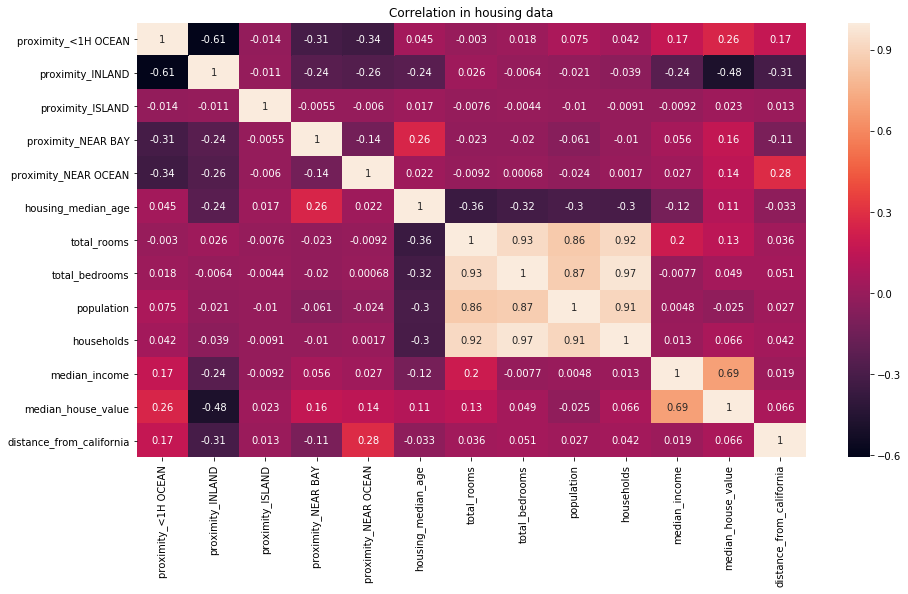

In [24]:
import seaborn as sns

plt.figure(figsize=(15,8))


corr = housing_df_new.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.title('Correlation in housing data')
plt.plot()

<h3 style="background-color:green;color:white">Standerdise our data</h3>

In [25]:
x_feature=housing_df_new.drop(columns='median_house_value')
y_target=housing_df_new['median_house_value']


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_feature, y_target, test_size = 1/4, 
                                                     random_state = 0)
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = pd.DataFrame(independent_scalar.fit_transform (x_train),index=x_train.index,columns=x_train.columns) #fit and transform
x_test = pd.DataFrame(independent_scalar.transform (x_test),index=x_test.index,columns=x_test.columns) # only transform
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [27]:
x_train.head()

,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,distance_from_california
19226,1.121845,-0.679323,-0.013923,-0.353669,-0.386732,-0.764262,1.068091,0.412186,0.436631,0.327101,1.808122,0.343862
14549,-0.891389,-0.679323,-0.013923,-0.353669,2.585768,-0.843631,-0.480400,-0.641939,-0.768275,-0.670119,1.097891,1.599686
9093,-0.891389,1.472053,-0.013923,-0.353669,-0.386732,-0.764262,-0.955697,-0.972692,-0.971859,-1.027760,-0.349490,-0.521462
12213,1.121845,-0.679323,-0.013923,-0.353669,-0.386732,-1.240475,-1.084700,-1.179710,-1.141367,-1.194834,1.645924,1.072802
12765,-0.891389,1.472053,-0.013923,-0.353669,-0.386732,-0.605525,0.283095,0.535921,0.269744,0.616870,-0.717009,-0.380512


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f530b6e1e10>]],
      dtype=object)

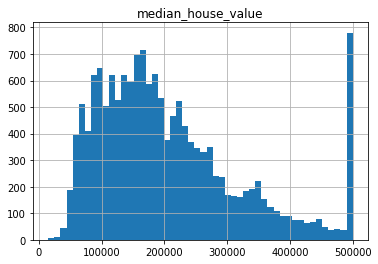

In [28]:
y_train.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5308ab2f60>]],
      dtype=object)

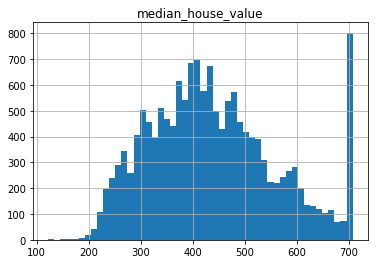

In [29]:
np.sqrt(y_train).hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f530899e0f0>]],
      dtype=object)

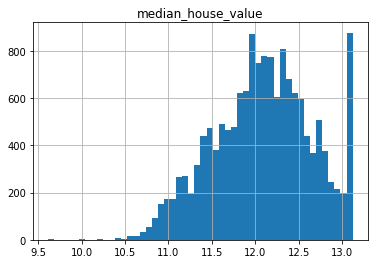

In [30]:
np.log(y_train).hist(bins=50)

<h5 style="background-color:green;color:white">from above histograms we can say square root of y_train gives distribution close to normal distribution. hence we will take square root of y_train and y_test </h5>

In [31]:
y_train=np.sqrt(y_train)
y_test=np.sqrt(y_test)

In [32]:

y_train.head()

,median_house_value
19226,617.494939
14549,573.846669
9093,430.581003
12213,707.107488
12765,312.249900


In [33]:
y_test.head()

,median_house_value
14740,370.000000
10101,491.222964
20566,447.995536
2670,269.258240
15709,678.232998


 <h1 style="background-color:green;color:white">Predictive Modeling</h1>

<h4 style="background-color:green;color:white"> Linear Regression</h4>

In [34]:
from sklearn.linear_model import LinearRegression

linear_regressoragent = LinearRegression()
linear_regressoragent.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#predict the X_test
predictValues = linear_regressoragent.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictValues))

72.33141914038299

In [37]:
linear_regressoragent.score(x_test,y_test)

0.6512403943232119

<h4 style="background-color:green;color:white"> Decision tree Regression</h4>

In [38]:
from sklearn.tree import DecisionTreeRegressor
model_dtregress=DecisionTreeRegressor(max_depth=8,random_state=10,criterion='mse',presort=True)
model_dtregress.fit(x_train,y_train)

predict_dtregress=model_dtregress.predict(x_test)
np.sqrt(mean_squared_error(y_test,predict_dtregress))

67.19112486979536

In [39]:
model_dtregress.score(x_test,y_test)

0.6990488345070018

<h4 style="background-color:green;color:white"> Random forest Regression</h4>

In [40]:
from sklearn.ensemble import RandomForestRegressor
model_rfregressor=RandomForestRegressor(n_estimators=15,criterion='mse',min_samples_split=3,random_state=40)
model_rfregressor.fit(x_train,np.array(y_train).ravel())
predict_rfregressor=model_rfregressor.predict(x_test)
np.sqrt(mean_squared_error(y_test,predict_rfregressor))

59.624760503580426

In [41]:
model_rfregressor.score(x_test,y_test)

0.7630124664153124

At this point we can drop households and total_rooms columns while creating model;
 since other columns are present which can convey similar information



In [42]:
x_train=x_train.drop(columns=['households','total_rooms'])
x_test=x_test.drop(columns=['households','total_rooms'])
x_test.head()

,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,housing_median_age,total_bedrooms,population,median_income,distance_from_california
14740,-0.891389,-0.679323,-0.013923,-0.353669,2.585768,-0.526156,-0.330222,0.108974,0.146289,2.042879
10101,1.121845,-0.679323,-0.013923,-0.353669,-0.386732,0.267531,-0.332602,-0.113834,1.005470,0.354755
20566,-0.891389,1.472053,-0.013923,-0.353669,-0.386732,0.029425,0.024325,0.111595,0.250216,-0.100769
2670,-0.891389,1.472053,-0.013923,-0.353669,-0.386732,0.664375,-0.834680,-0.905454,-0.751370,2.179562
15709,-0.891389,-0.679323,-0.013923,2.827503,-0.386732,-0.288050,-0.342120,-0.679152,0.596570,-0.185641


In [43]:
model_rfregressor1=RandomForestRegressor(n_estimators=15,criterion='mse',min_samples_split=3,random_state=40)
model_rfregressor1.fit(x_train,np.array(y_train).ravel())
predict_rfregressor1=model_rfregressor1.predict(x_test)
np.sqrt(mean_squared_error(y_test,predict_rfregressor1))

59.98290152069001

In [44]:
model_rfregressor1.score(x_test,y_test)

0.7601569459974005

<h4 style="background-color:green;color:white">  Bonus Exercise:</h4>

In [45]:
x_train=x_train.median_income
x_test=x_test.median_income

In [46]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [47]:
model_linear_regression=LinearRegression()
model_linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
predicted_test=model_linear_regression.predict(x_test)
predicted_train=model_linear_regression.predict(x_train)

In [49]:
model_linear_regression.score(x_test,y_test)

0.44302338196197383

In [50]:
np.sqrt(mean_squared_error(y_test,predicted_test))

91.40761530242808

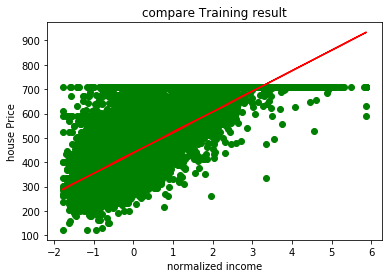

In [51]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot (x_train, predicted_train, color = 'red')
plt.title ('compare Training result')
plt.xlabel('normalized income')
plt.ylabel('house Price')
plt.show()


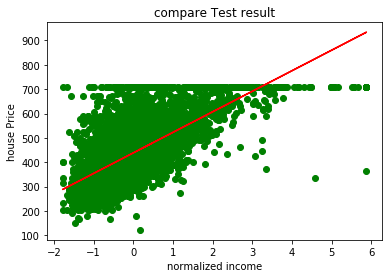

In [52]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot (x_test, predicted_test, color = 'red')
plt.title ('compare Test result')
plt.xlabel('normalized income')
plt.ylabel('house Price')
plt.show()